In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [209]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [210]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

In [211]:
df.shape

(29922, 6)

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [212]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [213]:
df['price'] = df['price'].str.replace('$','')
df['price'] = pd.to_numeric(df['price'])
df['line_total'] = df['line_total'].str.replace('$','')
df['line_total'] = pd.to_numeric(df['line_total'])

In [214]:
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,-1.5,2,-3.0
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,4.0,3,12.0
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,3.5,3,10.5
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,3.5,2,7.0


In [215]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [216]:
df.isnull().sum()

order_id         0
name          1488
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [217]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [218]:
df = df[df['name'].notna()]

In [219]:
df = df.drop_duplicates(subset=['order_id'])

#### Sanity check for value ranges and to check assumptions

In [220]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

8

In [221]:
df[df['line_total'] < 0].shape[0]

104

#### TODO:
Set line_total = price * quantity if different
Remove if line total < 0

In [222]:
df['line_total'] = df['price'] * df['quantity']

In [225]:
indexnames = df[(df['price'] * df['quantity']) != df['line_total']].index
df.drop(indexnames,inplace=True)
indexnames = df[df['line_total'] < 0].index
df.drop(indexnames,inplace=True)

In [226]:
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.5,3,4.5
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:59,2.5,2,5.0
...,...,...,...,...,...,...
29812,19995,"""BEVERAGE"" Espresso",2018-07-28 17:30:49,2.5,3,7.5
29814,19996,"""ICE CREAM"" Strawberry",2018-07-28 17:32:33,3.5,1,3.5
29816,19997,"""ICE CREAM"" Double Fudge Chunk",2018-07-28 17:40:40,3.5,2,7.0
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0


In [242]:
df.describe()

,order_id,price,quantity,line_total
count,9789.000000,9789.000000,9789.000000,9789.000000
mean,14998.464092,2.505414,1.999796,5.018694
std,2887.087150,1.057463,0.821030,3.091294
min,10000.000000,0.500000,1.000000,0.500000
25%,12500.000000,1.500000,1.000000,2.500000
50%,14996.000000,2.500000,2.000000,4.500000
75%,17499.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [246]:
s = pd.Series.to_string(df['name'])
df['category'] = (re.findall(r'"([^"]*)"', s))

In [247]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,SORBET
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0,SORBET
8,10003,"""ICE CREAM"" Matcha",2018-01-01 12:49:35,1.5,3,4.5,ICE CREAM
9,10004,"""BEVERAGE"" Iced Coffee",2018-01-01 13:22:59,2.5,2,5.0,BEVERAGE


#### Analysis, finally!

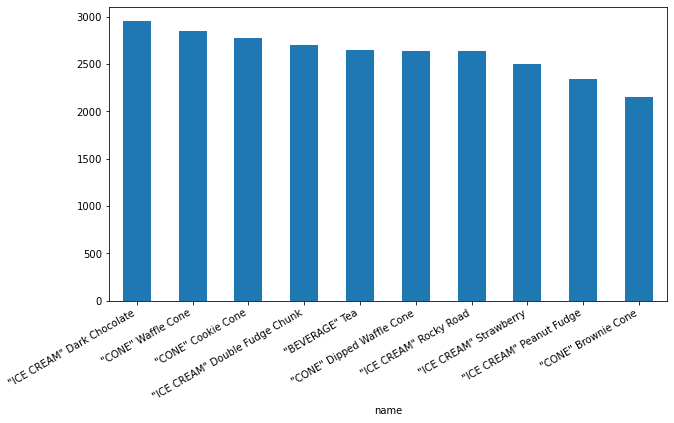

In [248]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()